#### Keras and Pytorch for the Fashion-MNIST classification

In [1]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
from keras.utils import to_categorical
%matplotlib inline


(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()
print("Train data shape: {}\nLabel shape: {}".format(x_train.shape,y_train.shape))
print("Test data shape: {}\nLabel shape: {}".format(x_test.shape,y_test.shape))

/home/karen/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Train data shape: (60000, 28, 28)
Label shape: (60000,)
Test data shape: (10000, 28, 28)
Label shape: (10000,)


In [2]:
print(y_train[:10])

[9 0 0 3 0 2 7 2 5 5]


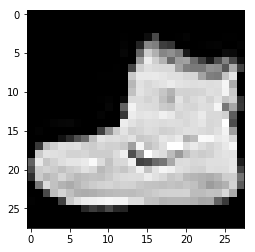

In [3]:
plt.imshow(x_train[0], cmap=plt.cm.gray)

#### Prepare dataset

In [4]:
x_train = ((x_train.reshape(60000,28,28,1)).astype('float32'))/255
x_test = ((x_test.reshape(10000,28,28,1)).astype('float32'))/255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

#### Data augmentation

In [5]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        rotation_range = 20,
        horizontal_flip = True)

#### Create model

In [6]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)          0         
__________

#### Compile and Train

In [7]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

#model.fit(x_train,y_train, batch_size=32,epochs=50)
model.fit_generator(datagen.flow(x_train, y_train, batch_size=32),
                    epochs = 20)

Epoch 1/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.6491 - acc: 0.7538
Epoch 2/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4410 - acc: 0.8356
Epoch 3/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3800 - acc: 0.8602
Epoch 4/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3490 - acc: 0.8713
Epoch 5/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3305 - acc: 0.8780
Epoch 6/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3177 - acc: 0.8833
Epoch 7/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3058 - acc: 0.8886
Epoch 8/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2947 - acc: 0.8914
Epoch 9/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2892 - acc: 0.8937
Epoch 10/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2846 - acc: 0.8948
Epoch 11/20
1875/1875 [=====

In [11]:
test_loss, test_acc = model.evaluate(x_test,y_test)
print("Test accuracy: {}%".format(test_acc*100))

10000/10000 [==============================] - 0s 37us/step
Test accuracy: 90.4%


#### Using pytorch with similar model

In [7]:
import torch 
import torch.nn as nn
from torch.nn import Conv2d, ReLU, MaxPool2d, Dropout2d,Linear
from torchvision.datasets import FashionMNIST
from torch.autograd import Variable
import torch.optim as optim
from torchvision import transforms
import torch.nn.functional as F
from torch.utils.data import DataLoader

device = torch.device('cuda: 0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


In [8]:
train_transform = transforms.Compose([transforms.RandomHorizontalFlip(),
                                    #transforms.RandomRotation(20),
                                    transforms.ToTensor(),
                                    transforms.Normalize((0.1307,),(0.3081,))])

test_transform = transforms.Compose([transforms.ToTensor(),
                                   transforms.Normalize((0.1307,),(0.3081,))])

#transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))

train_data = FashionMNIST('data/', train=True, transform=train_transform,download=True)
test_data = FashionMNIST('data/', train=False, transform=test_transform,download=False)

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

In [10]:
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.conv1 = nn.Sequential(
            Conv2d(1, 32, kernel_size=3),
            ReLU(),
            MaxPool2d(kernel_size=2),
            Dropout2d(p=0.25))
        self.conv2 = nn.Sequential(
            Conv2d(32, 64, kernel_size=3),
            ReLU(),
            MaxPool2d(kernel_size=2),
            Dropout2d(p=0.25))
        self.conv3 = nn.Sequential(
            Conv2d(64, 128, kernel_size=3),
            ReLU()
            )
            
        self.fc1 = Linear(1152,64)
        self.fc2 = Linear(64,10)
    
    def forward(self,x):
        out = self.conv1(x)
        out = self.conv2(out)
        out = self.conv3(out)
        out = out.reshape(out.size(0),-1)
        out = self.fc1(out)
        out = self.fc2(out)
        return out

model = Net()

In [11]:
#Loss and optimizer#Loss an 
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [12]:
#Train model
num_epochs = 20
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images
        labels = labels
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 500 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

Epoch [1/20], Step [500/1875], Loss: 0.5063
Epoch [1/20], Step [1000/1875], Loss: 0.4216
Epoch [1/20], Step [1500/1875], Loss: 0.5882
Epoch [2/20], Step [500/1875], Loss: 0.4526
Epoch [2/20], Step [1000/1875], Loss: 0.2687
Epoch [2/20], Step [1500/1875], Loss: 0.3794
Epoch [3/20], Step [500/1875], Loss: 0.3182
Epoch [3/20], Step [1000/1875], Loss: 0.2797
Epoch [3/20], Step [1500/1875], Loss: 0.2367
Epoch [4/20], Step [500/1875], Loss: 0.3937
Epoch [4/20], Step [1000/1875], Loss: 0.2160
Epoch [4/20], Step [1500/1875], Loss: 0.2132
Epoch [5/20], Step [500/1875], Loss: 0.3809
Epoch [5/20], Step [1000/1875], Loss: 0.4718
Epoch [5/20], Step [1500/1875], Loss: 0.3038
Epoch [6/20], Step [500/1875], Loss: 0.1538
Epoch [6/20], Step [1000/1875], Loss: 0.4204
Epoch [6/20], Step [1500/1875], Loss: 0.1885
Epoch [7/20], Step [500/1875], Loss: 0.0849
Epoch [7/20], Step [1000/1875], Loss: 0.2882
Epoch [7/20], Step [1500/1875], Loss: 0.5546
Epoch [8/20], Step [500/1875], Loss: 0.3298
Epoch [8/20], Step

In [13]:

#Test model
model.eval()  # eval mode (batchnorm uses moving mean/variance instead of mini-batch mean/variance)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images
        labels = labels
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Test Accuracy of the model: {} %'.format(100 * correct / total))

Test Accuracy of the model: 90.36 %
